In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Yêu cầu 1:
    1.1 Sử dụng  cv.calcHist()  với openCV
         cú pháp: cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
         images: Nguồn dữ liệu ảnh , thường có kiểu uint8, float 32, thường đặc trong dấu ngoặc vuông
         channels: Chỉ kênh của dữ liệu ảnh là chỉ số thường được đặt trong dấu ngoặc vuông. các giá trị thường thấy [0] khi là ảnh xám, [0];[1];[2] tương ứng với red,green, blue
         mask: mặt nạ cho ảnh, thường có giá trị là None, còn nếu muốn tính histogram trong 1 vùng cụ thể thì ta cần tạo mặt nạ cho nó 
            "mask = np.zeros(img.shape[:2], np.uint8)
            mask[100:300, 100:400] = 255
            masked_img = cv.bitwise_and(img,img,mask = mask)"
        histSize: biểu diễn chỉ số BIN- giá trị chỉ mục mà bạn muốn đếm pixel trong khoản đó-(bin) , chỉ số thường thấy là [256]
        ranges: chỉ phạm vi cường độ muốn đó lường thường trong khoảng [0,256]-tất cả cường độ
    1.2 Sử dụng np.histogram() với numpy:
        cú pháp: numpy.histogram(images, bins=10, range=None, weights=None, density=False)
        images: Nguồn dữ liệu ảnh , thường có kiểu uint8, float 32, thường đặc trong dấu ngoặc vuông
        bin: biểu diễn chỉ số BIN- giá trị chỉ mục mà bạn muốn đếm pixel trong khoản đó , chỉ số thường thấy là [256] ở đây mặc định là 10
        ranges: chỉ phạm vi cường độ muốn đó lường thường trong khoảng [0,256]-tất cả cường độ
        weights: Trọng số của dữ liệu, thường thiết lập None(mặc định)
        density: chuẩn hóa histogram hay không - có 2 giá trị True False
        trả về tuple gồm 2 mảng : giá trị histogram và ranh giới các bin 

2.1: Vẽ histogram
    matlplotlib:

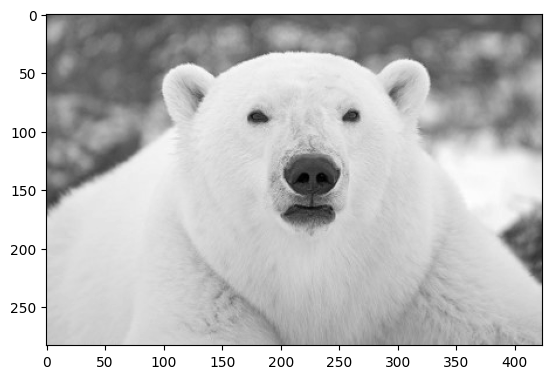

In [11]:
img = cv2.imread('Bear.jpg', cv2.IMREAD_GRAYSCALE) #đọc ảnh
plt.imshow(img, cmap='gray')# hiển thị ảnh này

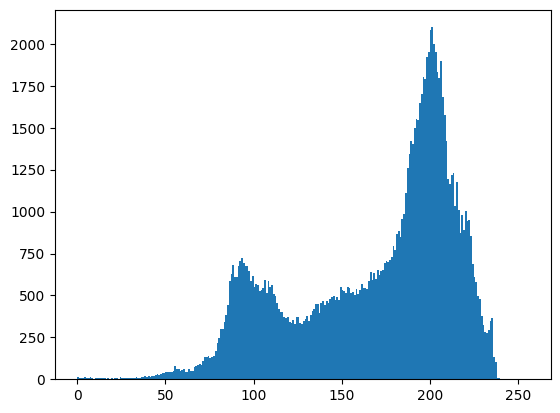

In [2]:

assert img is not None, "file could not be read, check with os.path.exists()"# kiểm tra ảnh nếu đường dẫn không tồn tại
plt.hist(img.ravel(),256,[0,256]); plt.show() #Tính Histogram và vẽ histogram


2.1: Vẽ histogram
    OpenCV:

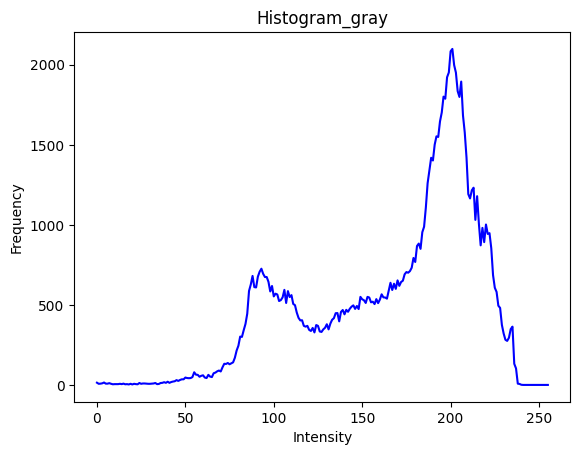

In [12]:
hist = cv2.calcHist([img], [0], None, [256], [0,256]) #Tính Histogram

# Vẽ histogram
plt.plot(hist, color='blue')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram_gray')
plt.show()

3.Histogram với ảnh màu:

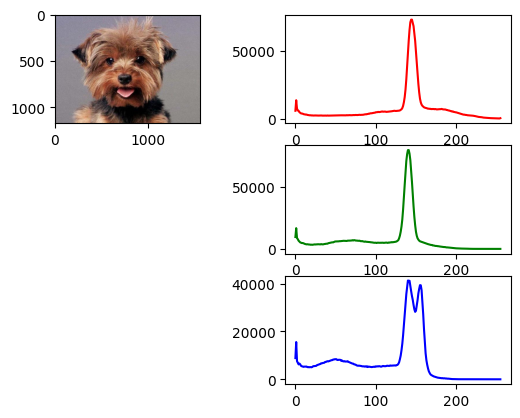

In [13]:
img_cl = cv2.imread('Dog.jpg') # đọc ảnh
img_rgb = cv2.cvtColor(img_cl, cv2.COLOR_BGR2RGB) #chuyển sang hệ rgb
color = ('r','g','b')
plt.subplot(3,2,1) #thiết lập vị trí hiển thị cho ảnh gốc
plt.imshow(img_rgb, cmap='gray')#hiển thị ảnh gốc
y=0
for i,col in enumerate(color):
 y=y+2
 histr = cv2.calcHist([img_rgb],[i],None,[256],[0,256]) #Tính các histogram
 plt.subplot(3,2,y) #thiết lập vị trí hiển thị cho các histogram
 plt.plot(histr,color = col) #Chỉnh màu cho histogram
 
plt.show()

4.Hàm xử lý histogram:

In [20]:
#Cộng tổ chức đồ 
def cong_histogram(hist, value): 
    hist_n = hist + value
    return hist_n
#Căng tổ chức đồ 
def cang_histogram(hist, value):
    if(value>0):
        hist_n = hist * value
        return hist_n
    else:# nếu giá trị nhỏ hơn hoặc bằng 0 thì trả về giá trị ban dầu
        hist_n = hist

    #Tuyến tính tổ chức đồ
def tt_histogram(img, L_max):
    hist, _ = np.histogram(img.ravel(), L_max + 1, [0, L_max])
    
    # Tìm giá trị tối thiểu và tối đa trong hình ảnh
    img_min = np.min(img)
    img_max = np.max(img)
    
    # Áp dụng công thức biến đổi tuyến tính cho từng giá trị pixel
    transformed_img = (img - img_min) / (img_max - img_min) * L_max
    
    # Tính toán histogram của hình ảnh sau khi biến đổi
    transformed_hist, _ = np.histogram(transformed_img.ravel(), L_max + 1, [0, L_max])
    
    return transformed_hist

#Cân bằng tổ chức đồ 
def cb_histogram(img): 
    equalized_img = cv2.equalizeHist(img)
    histr_cb = cv2.calcHist([equalized_img],[0],None,[256],[0,256])
    return histr_cb

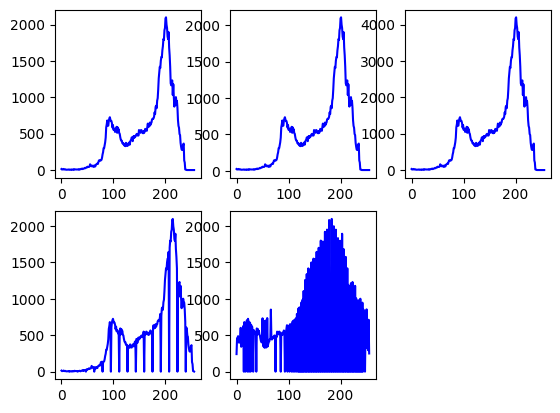

In [23]:


histr = cv2.calcHist([img],[0],None,[256],[0,256])
cong_histr= cong_histogram(histr, 10)
cang_histr= cang_histogram(histr, 2)
tt_histr=tt_histogram(img, 255)
cb_histr=cb_histogram(img)
listhistr=[histr,cong_histr, cang_histr, tt_histr, cb_histr]

y=0
for i in listhistr:
 y=y+1
 plt.subplot(2,3,y) #thiết lập vị trí hiển thị cho các histogram
 plt.plot(i,color = 'blue') #Chỉnh màu cho histogram

Phân ngưỡng đơn: Là kỹ thuật trong OpenCV. Lấy một giá trị pixel để làm giá trị ngưỡng. Các giá trị nhỏ hơn ngưỡng sẽ được chuyển về 0 và giá trị lớn hơn sẽ chuyển về giá trị tối đa (thông thường). Rất phổ biến trong kỹ thuật phân đoạn. Phân ngưỡng có 2 vùng: Trên ngưỡng và dưới ngưỡng. Kỹ thuật này dùng cho ảnh xám
    cú pháp:cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
    source: ma trận ảnh(ảnh xám)
    thresholdValue: Giá trị ngưỡng
    maxVal: giá trị tối đa
    thresholdingTechnique: Các kỹ thuật phân ngưỡng:
        cv2.THRESH_BINARY: v > threshold_v->v=255, v < threshold_v-> v=0
        cv2.THRESH_BINARY_INV: ngược với THRESH_BINARY
        cv2.THRESH_TRUNC: v > threshold_v-> v=threshold_v,  v < threshold_v-> v=v
        cv2.THRESH_TOZERO: v > threshold_v-> v=v,  v < threshold_v-> v=0
        cv2.THRESH_TOZERO_INV: v > threshold_v-> v=0,  v < threshold_v-> v=v

In [24]:
# đọc ảnh
image1 = cv2.imread('Bear.jpg')  
#chuyển ảnh xám
img_thres = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
#cho ngưỡng làgiá trị 120 
# giá trị tối đa là 255
#mỗi ảnh dùng một kỹ thuật phân ngưỡng khác nhau
ret, thresh1 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_BINARY) 
ret, thresh2 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_BINARY_INV) 
ret, thresh3 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_TOZERO) 
ret, thresh5 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_TOZERO_INV) 

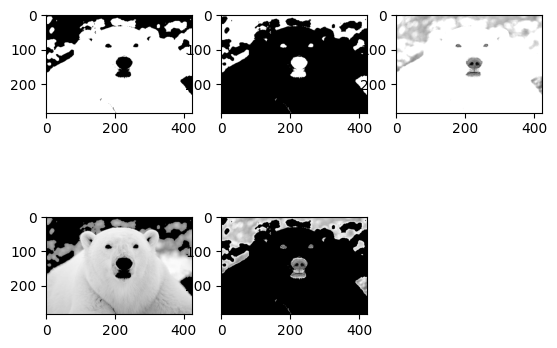

In [27]:
listthres=[thresh1,thresh2, thresh3, thresh4, thresh5]

for i in range(len(listthres)):
 plt.subplot(2,3,i+1) #thiết lập vị trí hiển thị cho các ảnh
 plt.imshow(listthres[i],cmap = 'gray') #Xuất ảnh

Phân ngưỡng thích nghi: Là phương pháp phân ngưỡng trong 1 vùng ảnh nhất định, nguyên lý hoạt động giống như Phân ngưỡng đơn. dùng thay đổi giá trị pixel cho từng vùng khác nhau trong ảnh
cú pháp: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)
source:Ma trận ảnh(ảnh có 1 kênh, kiểu 8-bit, float-point)
maxVal: giá trị tối đa được nhận bởi 1 pixel 
adaptiveMethod: Phương pháp thích ứng, cách để tính toán giá trị phân ngưỡng
    cv2.ADAPTIVE_THRESH_MEAN_C: Giá trị ngưỡng= Giá trị trung bình của 1 vùng ảnh trừ cho hằng số cho trước
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Giá trị ngưỡng = Tổng trọng số Gaussian trừ cho hằng số cho trước
thresholdType: Loại tính toán phân ngưỡng-như phân ngưỡng đơn
blocksize: kích thước của vùng ảnh được chọn để tính toán
constant: Hằng số cho trước dùng để trừ với trung bình hay tổng trọng số

In [28]:
  
# kích thước vùng chọn 199px 
# Sử dụng các loại phân ngưỡng thích ứng khác nhau 
#Hằng số là 5
thresh21 = cv2.adaptiveThreshold(img_thres, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 
  
thresh22 = cv2.adaptiveThreshold(img_thres, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

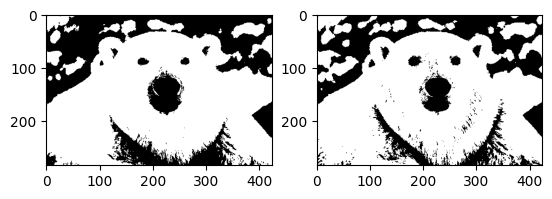

In [30]:
listthres2=[thresh21,thresh22]

for i in range(len(listthres2)):
 plt.subplot(1,2,i+1) #thiết lập vị trí hiển thị cho các ảnh
 plt.imshow(listthres2[i],cmap = 'gray') #Xuất ảnh

Phân ngưỡng otsu : Giá trị phân ngưỡng được tạo ra tự động.Xét hình ảnh 2 chiều -> biểu đồ tạo ra chứa 2 đỉnh giá trị-> giá trị phân ngưỡng nằm giữa cả 2 đỉnh đó
cú pháp: khá tương đồng với phân ngưỡng đơn->ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 


In [31]:
ret, thresh31 = cv2.threshold(img_thres, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 

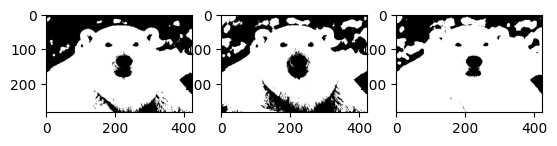

In [32]:
listthres3=[thresh31,thresh21, thresh1]

for i in range(len(listthres3)):
 plt.subplot(1,3,i+1) #thiết lập vị trí hiển thị cho các ảnh
 plt.imshow(listthres3[i],cmap = 'gray') #Xuất ảnh

Lọc trên ảnh:
    Lọc tuyến tính cú pháp: cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
    src: ảnh đầu vào
    ddepth: độ xâu của ảnh kết quả-> Kiểu ảnh kết quả, mặc định là -1
    kernel: mặt nạ lọc để thực hiện quá trình tích chập
    dst: Biến lưu kết quả đầu ra
    anchor(tùy chọn): Điểm gốc của mặt nạ tích chập nếu không thiết lặp giá trị sẽ mặc định (-1,-1)-> trung tâm mặt nạ
    delta(tùy chọn): độ chênh lêch sau khi lọc-> chỉnh độ sáng độ tương phản, mặc định là 0
    borderType(tùy chọn): Phương pháp đường biên trong quá trình lọc
        cv2.BORDER_CONSTANT: đường biên là số cố định
        cv2.BORDER_REPLICATE: đường biên là lặp lại từ các pixel biên ảnh
        cv2.BORDER_REFLECT: đường biên là phản chiếu từ các pixel biên ảnh


In [33]:
img_fll = cv2.imread('Dog.jpg')
img_fll_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 


In [34]:
kernel_box_blur = np.ones((3,3), dtype=np.float32) / 9
kernel_sharpness = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)


In [35]:
blur_fll = cv2.filter2D(img_fll_gray, -1, kernel_box_blur)
sharp_fll = cv2.filter2D(blur_fll, -1, kernel_sharpness)

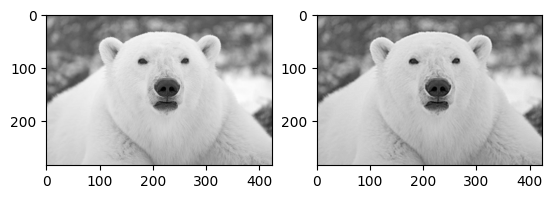

In [37]:
plt.subplot(121)
plt.imshow(img_fll_gray, cmap='gray')
plt.subplot(122)
plt.imshow(sharp_fll, cmap='gray')

Gaussian Blur: Tìm trọng số trung bình của pixel. Tính toán trọng số dựa trên khoản cánh từ trung tâm mặt nạ